# <font color=brown> **`Bank Telemarketing Compaign`**

## **Import Important Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import scipy.stats as stats

In [4]:
## Ignore any kind of filter warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
## Display the maximum column
pd.set_option('display.max_columns',None)

In [6]:
# load and read the csv file 
# Remove unwanted rows and make the main rows to header
df = pd.read_csv(r"C:\Users\DeLL\Downloads\bank_marketing_updated_v1.csv",header=2)

# View the First Few Rows
df.head(4)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no


### <font color=yellow> **1. Understanding the Dataset**

In [8]:
# Check the Structure of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

<Figure size 800x400 with 0 Axes>

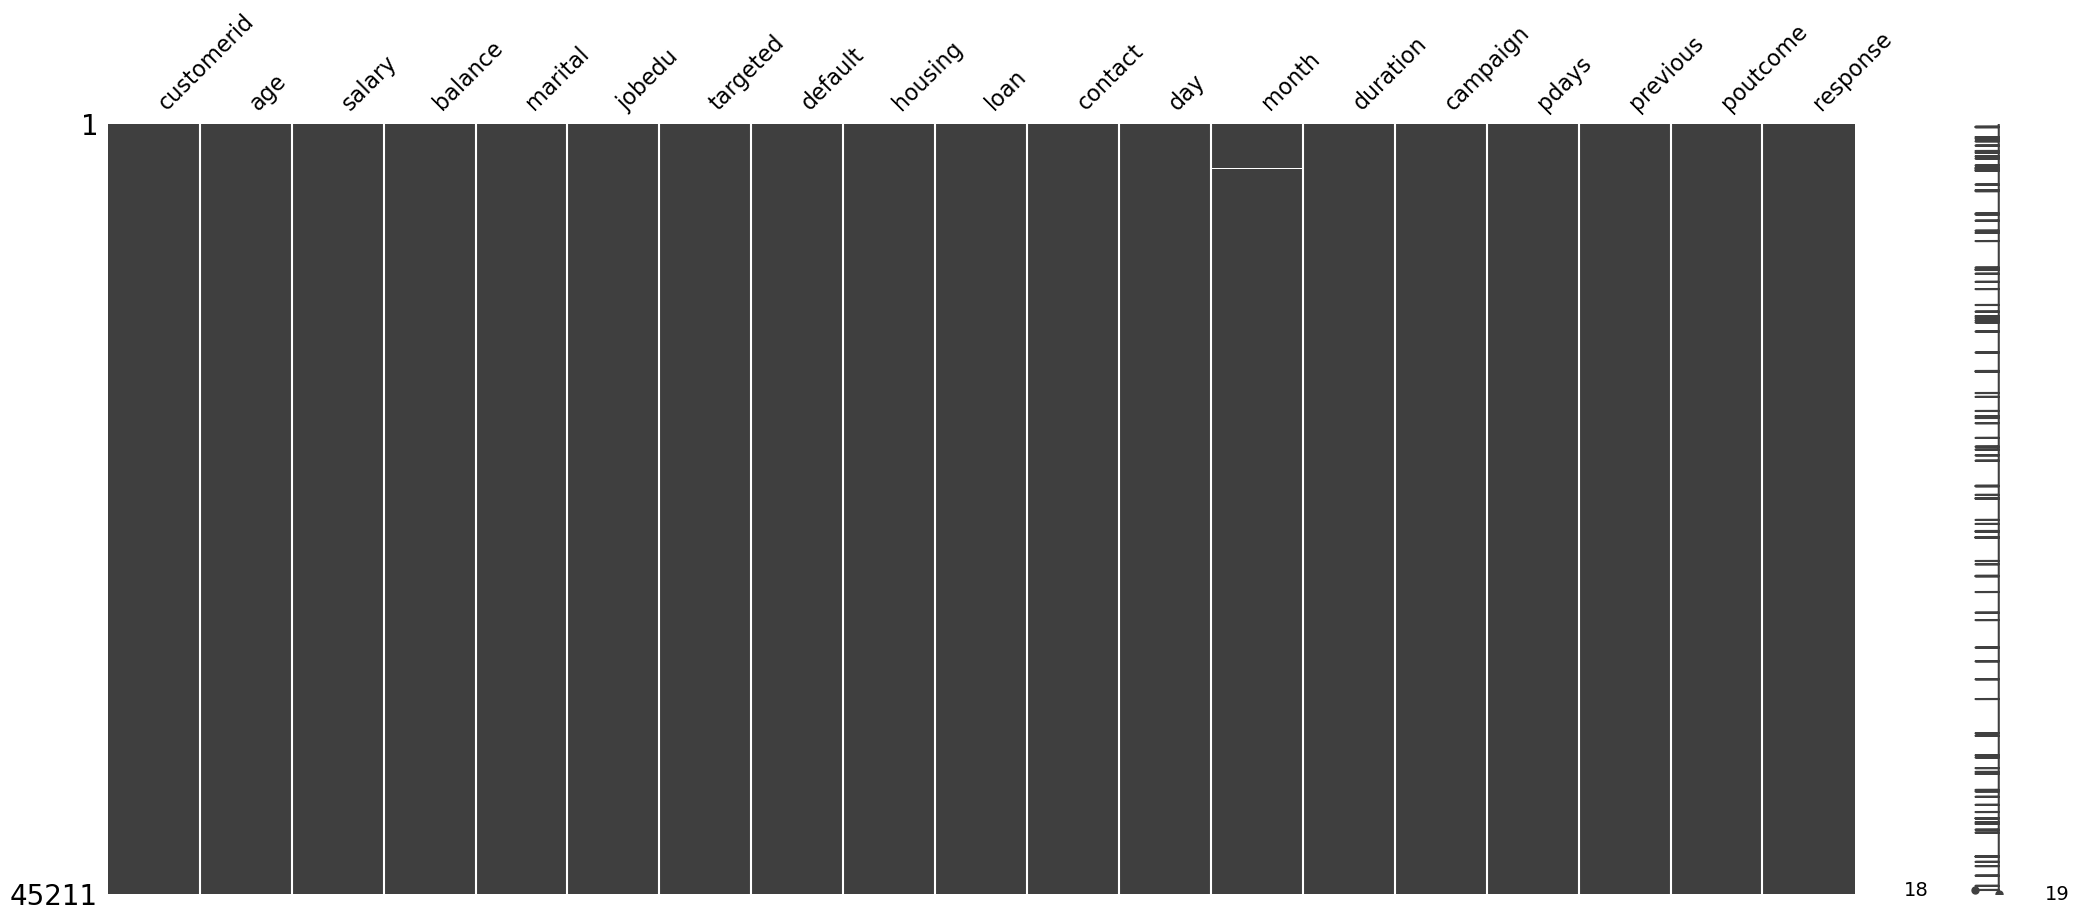

In [9]:
# Get the missing value through the matrix chart
import missingno as msno
plt.figure(figsize=(8,4))
msno.matrix(df)
plt.show()

In [10]:
# Change day and month to datetime column
df['date'] = df['day'].astype(str) + '/' + df['month']
df['date'] = pd.to_datetime(df['date'])
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05


In [11]:
# Summary of the data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
customerid,45211.0,22606.0,1.0,11303.5,22606.0,33908.5,45211.0,13051.435847
age,45191.0,40.935651,18.0,33.0,39.0,48.0,95.0,10.619198
salary,45211.0,57006.171065,0.0,20000.0,60000.0,70000.0,120000.0,32085.718415
balance,45211.0,1362.272058,-8019.0,72.0,448.0,1428.0,102127.0,3044.765829
day,45211.0,15.806419,1.0,8.0,16.0,21.0,31.0,8.322476
campaign,45211.0,2.763841,1.0,1.0,2.0,3.0,63.0,3.098021
pdays,45211.0,40.197828,-1.0,-1.0,-1.0,-1.0,871.0,100.128746
previous,45211.0,0.580323,0.0,0.0,0.0,0.0,275.0,2.303441
date,45161,2017-06-20 04:55:44.514072064,2017-01-06 00:00:00,2017-05-09 00:00:00,2017-06-04 00:00:00,2017-08-05 00:00:00,2017-12-31 00:00:00,NaN


#### <font color=skycolor> A). Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

In [13]:
# Check for Missing Values
df.isnull().sum()

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
date          50
dtype: int64

In [14]:
# Check the Data Types of All Columns
df.dtypes

customerid             int64
age                  float64
salary                 int64
balance                int64
marital               object
jobedu                object
targeted              object
default               object
housing               object
loan                  object
contact               object
day                    int64
month                 object
duration              object
campaign               int64
pdays                  int64
previous               int64
poutcome              object
response              object
date          datetime64[ns]
dtype: object

In [15]:
# Examine Unique Values in Each Column
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n")

Unique values in column 'customerid':
[    1     2     3 ... 45209 45210 45211]


Unique values in column 'age':
[58. 44. 33. 47. 35. 28. 42. 43. 41. 29. 53. 57. 51. 45. 60. 56. 32. 25.
 40. 39. 52. 46. 36. 49. 59. 37. 50. 54. 55. 48. 24. 38. 31. 30. 27. 34.
 23. 26. nan 61. 22. 21. 20. 66. 62. 83. 75. 67. 70. 65. 68. 64. 69. 72.
 71. 19. 76. 85. 63. 90. 82. 73. 74. 78. 80. 94. 79. 77. 86. 95. 81. 18.
 89. 84. 87. 92. 93. 88.]


Unique values in column 'salary':
[100000  60000 120000  20000      0  55000  50000  70000   8000  16000
   4000]


Unique values in column 'balance':
[ 2143    29     2 ...  8205 14204 16353]


Unique values in column 'marital':
['married' 'single' 'divorced']


Unique values in column 'jobedu':
['management,tertiary' 'technician,secondary' 'entrepreneur,secondary'
 'blue-collar,unknown' 'unknown,unknown' 'entrepreneur,tertiary'
 'retired,primary' 'admin.,secondary' 'technician,unknown'
 'services,secondary' 'admin.,unknown' 'blue-collar,primary'
 'blue-collar

In [16]:
# Check for Duplicate Rows
df.duplicated().sum()

0

In [17]:
# number of rows and columns
df.shape

(45211, 20)

### <font color=red> ***Handling the Missing values***

In [19]:
# Check for Missing Values
miss_value = df.isnull().sum()
print("Total missing value in each column :\n", miss_value)

# Hadling the missing value if presents in specific columns
df['month'] = df['month'].fillna(df['month'].mode()[0])
df['response'] = df['response'].fillna(df['response'].mode()[0])
df['age'] = df['age'].fillna(df['age'].median())
df['date'] = df['date'].fillna(df['date'].mode()[0])

Total missing value in each column :
 customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
date          50
dtype: int64


In [20]:
# After handle the missing value
print("There are no any missing value presents :\n", df.isna().sum())

There are no any missing value presents :
 customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
date          0
dtype: int64


#### <font color = skycolor> B). Inspect for any instances of missing values, outliers, or data inconsistencies.

In [22]:
df.head(4)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,2017-05-05


In [23]:
#  Check for Missing Values
missing_values = df.isnull().sum()

#  Check for Outliers using IQR method
Q1 = df[["age","salary","balance","campaign","pdays","previous"]].quantile(0.25)
Q3 = df[["age","salary","balance","campaign","pdays","previous"]].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[["age","salary","balance","campaign","pdays","previous"]] < (Q1 - 1.5 * IQR)) | (df[["age","salary","balance","campaign","pdays","previous"]] > (Q3 + 1.5 * IQR))).sum()

# Check for Data Inconsistencies
# Example: Inspect unique values in categorical columns
inconsistencies = {}
for column in df.select_dtypes(include='object').columns:
    inconsistencies[column] = df[column].unique()

# Display results
print("Missing Values:\n", missing_values)
print("\nOutliers present in specific column:\n", outliers)
print("\nData Inconsistencies:\n", inconsistencies)

Missing Values:
 customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
date          0
dtype: int64

Outliers present in specific column:
 age          487
salary         0
balance     4729
campaign    3064
pdays       8257
previous    8257
dtype: int64

Data Inconsistencies:
 {'marital': array(['married', 'single', 'divorced'], dtype=object), 'jobedu': array(['management,tertiary', 'technician,secondary',
       'entrepreneur,secondary', 'blue-collar,unknown', 'unknown,unknown',
       'entrepreneur,tertiary', 'retired,primary', 'admin.,secondary',
       'technician,unknown', 'services,secondary', 'admin.,unknown',
       'blue-collar,primary', 'blue-collar,secondary',
       'management,secondary', 'retired,secondary', 'retired,unknown',

### <font color=purple> ***Visualization Outliers if presents in the columns***

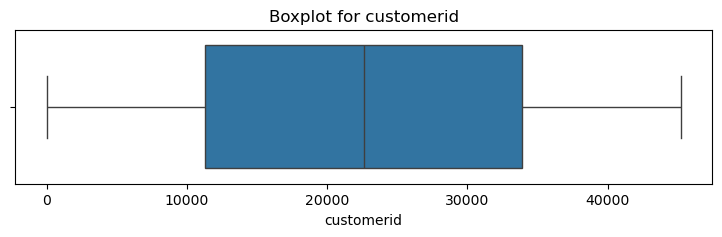

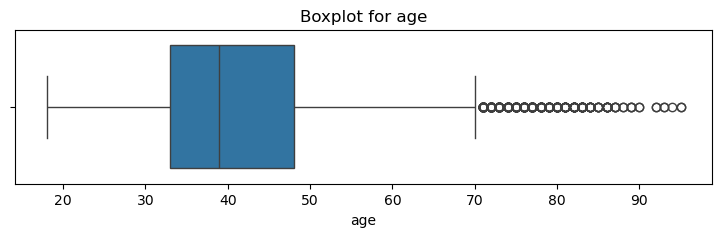

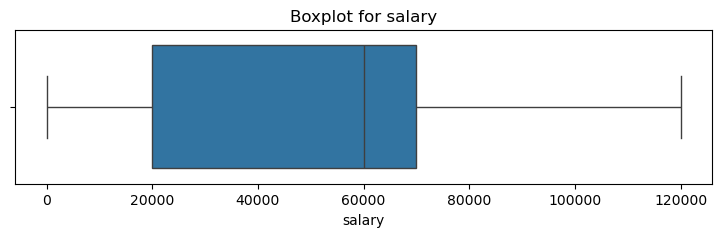

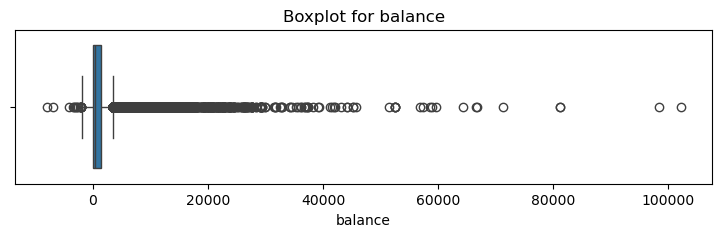

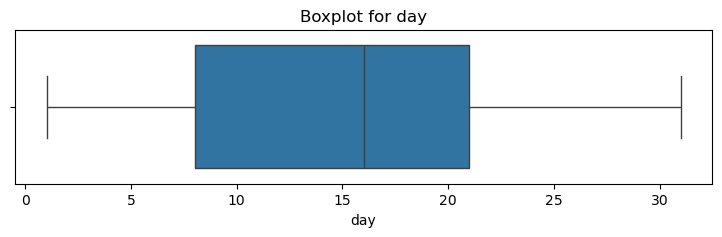

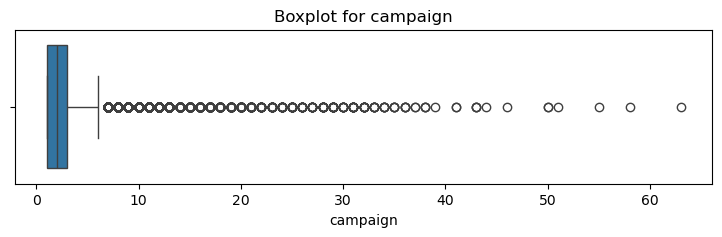

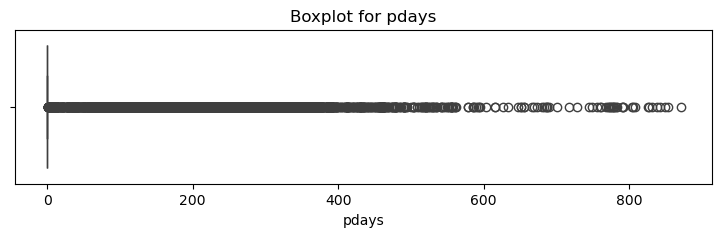

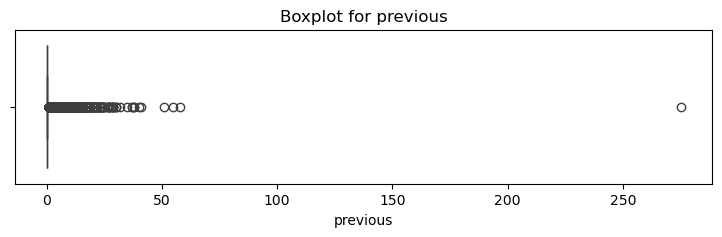

In [25]:
for column in df.select_dtypes(include = "number").columns:
    plt.figure(figsize=(9, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

## <font color=yellow> **2). Descriptive Statistics**
>
- Performing Central tendency(mean, median, mode)
- perfoming measure of dispersion(std, variance, corr)

In [27]:
# Stastical summary for numeric column
new_var = df[["age","salary","balance","campaign","pdays","previous"]]
new_var.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.934795,10.616926,18.0,33.0,39.0,48.0,95.0
salary,45211.0,57006.171065,32085.718415,0.0,20000.0,60000.0,70000.0,120000.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


#### <font color=skycolour> A). Derive summary statistics (mean, median, standard deviation) for relevant columns.

Mean For the numeric Variables :----
 age            40.934795
salary      57006.171065
balance      1362.272058
campaign        2.763841
pdays          40.197828
previous        0.580323
dtype: float64

Median For the numeric Variables :----
 age            39.0
salary      60000.0
balance       448.0
campaign        2.0
pdays          -1.0
previous        0.0
dtype: float64

Standard deviation For the numeric Variables :----
 age            10.616926
salary      32085.718415
balance      3044.765829
campaign        3.098021
pdays         100.128746
previous        2.303441
dtype: float64

Skweness For the numeric Variables----
 age          0.685377
salary       0.137829
balance      8.360308
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

Kurtosis For the numeric Variables----
 age            0.321689
salary        -1.005143
balance      140.751547
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64


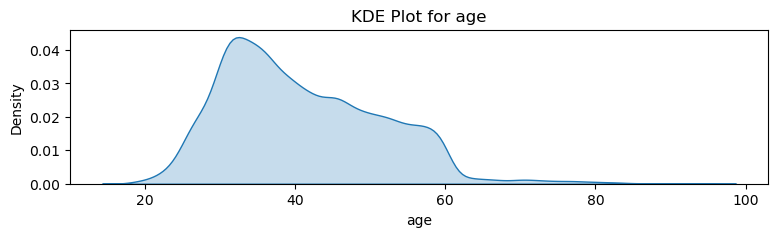

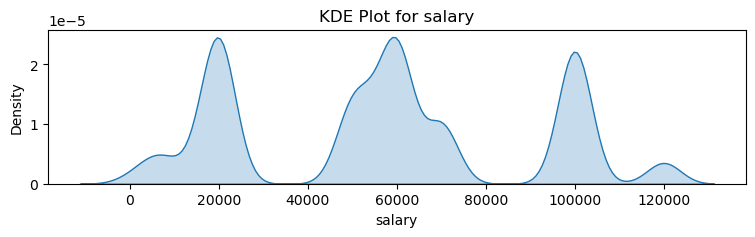

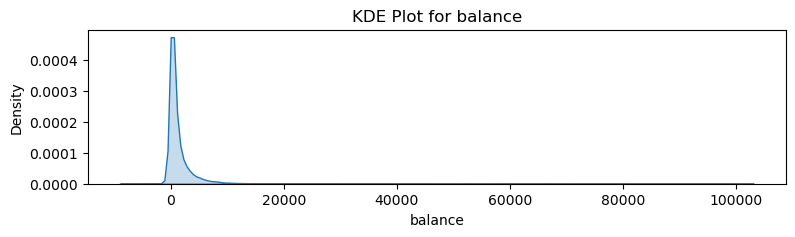

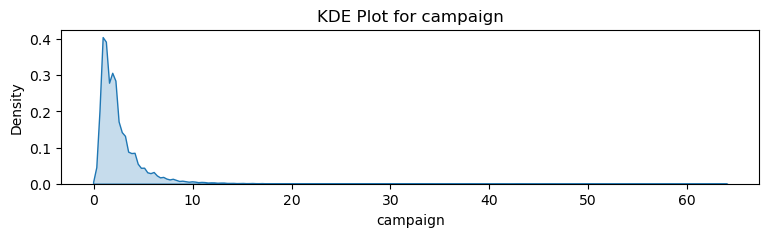

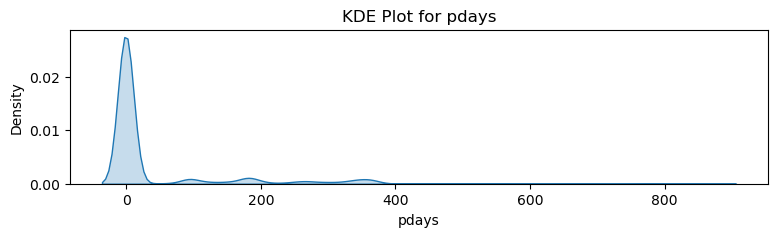

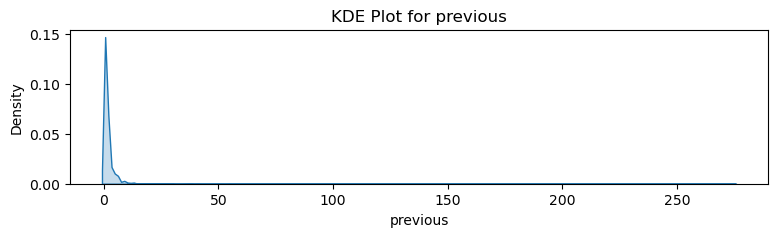

In [29]:
print('Mean For the numeric Variables :----\n',new_var.mean())
print('\nMedian For the numeric Variables :----\n',new_var.median())
print('\nStandard deviation For the numeric Variables :----\n',new_var.std())
print('\nSkweness For the numeric Variables----\n',new_var.skew())
print('\nKurtosis For the numeric Variables----\n',new_var.kurt())

# Filter for only numeric columns
numeric_columns = new_var.select_dtypes(include=['number']).columns

# Iterate over numeric columns and plot KDE
for column in numeric_columns:
    plt.figure(figsize=(9, 2))
    sns.kdeplot(data=new_var[column], fill=True)
    plt.title(f'KDE Plot for {column}')
    plt.show()
    


 #### <font color =skycolor> **B). Examine the distribution of the target variable, indicating responses to the term deposit campaign.***

In [31]:
df.head(4)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,2017-05-05



Perticular customer before targeted or not :
 targeted
yes    37091
no      8120
Name: count, dtype: int64


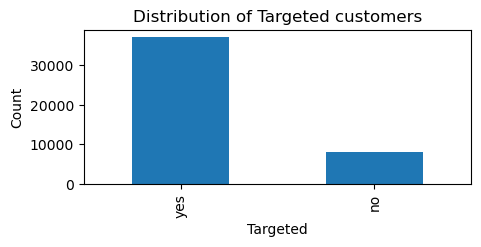

In [32]:
# Check the distribution
target_distribution = df["targeted"].value_counts()
print("\nPerticular customer before targeted or not :\n",target_distribution)

# Plotting the distribution
plt.figure(figsize=(5,2))
target_distribution.plot(kind='bar')
plt.title('Distribution of Targeted customers')
plt.xlabel('Targeted')
plt.ylabel('Count')
plt.show()

+ Interpretation:
  - If the target variable is balanced means a majority of "Yes" | "No" is equal, then the campaign might have had mixed success.
  - If the target variable is unbalanced means a majority of "Yes" resposes, then the campaign is successful.

    

campaign
1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: count, dtype: int64


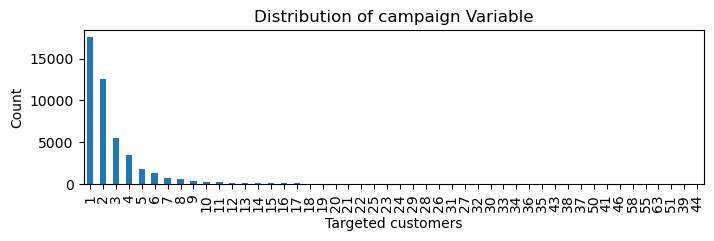

In [34]:
## This column is the number of campaign in which customer is contacted.
# These unique numbers are represents how many times customer is contacted through the campaign.

target_distributions = df["campaign"].value_counts()
print(target_distributions)

# Plotting the distribution
plt.figure(figsize=(8,2))
target_distributions.plot(kind='bar')
plt.title('Distribution of campaign Variable')
plt.xlabel('Targeted customers')
plt.ylabel('Count')
plt.show()

+ Description:
  - The highest numbers of campaign occurs in 1 campaign.

## <font color=yellow> **3). Univariate Analysis**
> 
  - Understanding Data Distribution
  - Identifying Patterns
  - Data Summarization

#### <font color= skycolor> **A). Examine the distribution of individual key features, such as age, balance, and call duration.**


In [38]:
# Split call_duration into two separate columns
df[['duration_int', 'sec_str']] = df['duration'].str.split(' ',expand=True)
df.head(3)


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec


In [39]:
# Apply lambda function to convert duration to seconds
# Standardize the values to one unit
df['duration_in_second'] = df['duration'].apply(lambda x: float(x.split()[0]) * (60 if x.split()[1] == 'min' else 1))
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,2017-05-05,92,sec,92.0
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,2017-05-05,198,sec,198.0


In [40]:
# Some statistical overview of the features.
print("Distribution of age :\n\n",df['age'].describe())
print("\nDistribution of balance :\n\n",df['balance'].describe())
print("\nDistribution of call_duaration :\n\n",df['duration_in_second'].describe())

Distribution of age :

 count    45211.000000
mean        40.934795
std         10.616926
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

Distribution of balance :

 count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

Distribution of call_duaration :

 count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration_in_second, dtype: float64


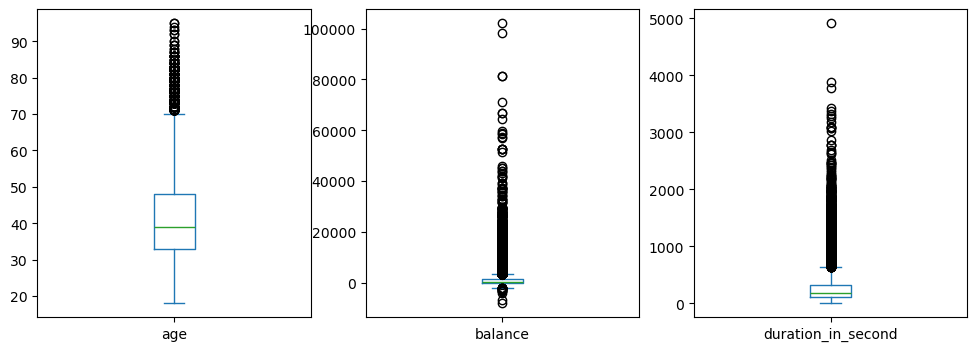

In [41]:
# Some distribution of boxplots for identifying outliers.
df[['age', 'balance', 'duration_in_second']].plot(kind='box', subplots=True, layout=(1, 3), figsize=(12, 4))
plt.show()

#### <font color=skycolor> **B). Employ visual aids like histograms, box plots, and kernel density plots to discern patterns and outliers.**

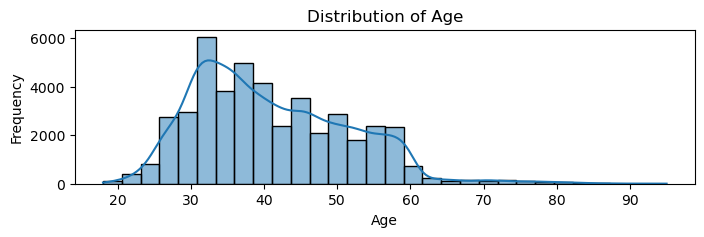

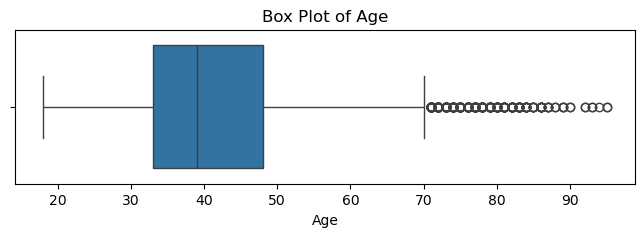

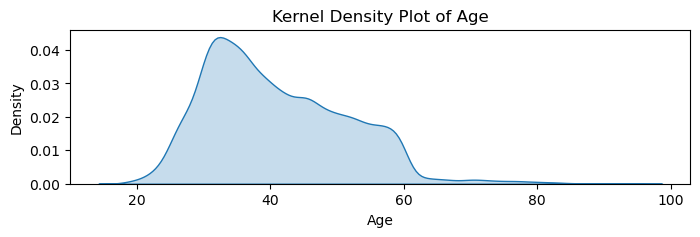

In [43]:
# Distribution of the age varible for visualization:

# Histogram
plt.figure(figsize=(8, 2))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 2))
sns.kdeplot(df['age'], shade=True)
plt.title('Kernel Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

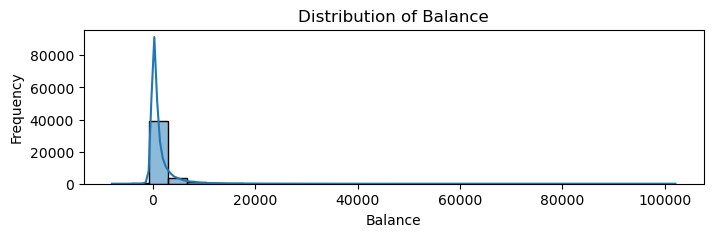

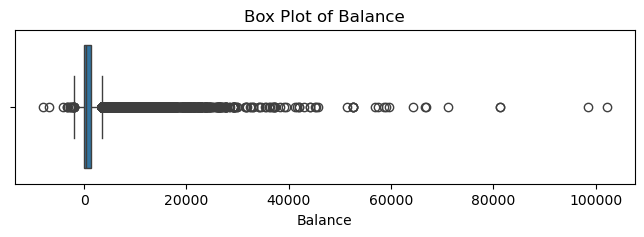

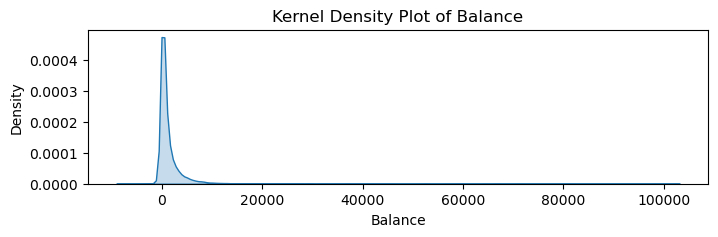

In [44]:
# Distribution of the balance varible for visualization: 
# Histogram
plt.figure(figsize=(8, 2))
sns.histplot(df['balance'], kde=True, bins=30)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['balance'])
plt.title('Box Plot of Balance')
plt.xlabel('Balance')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 2))
sns.kdeplot(df['balance'], shade=True)
plt.title('Kernel Density Plot of Balance')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.show()

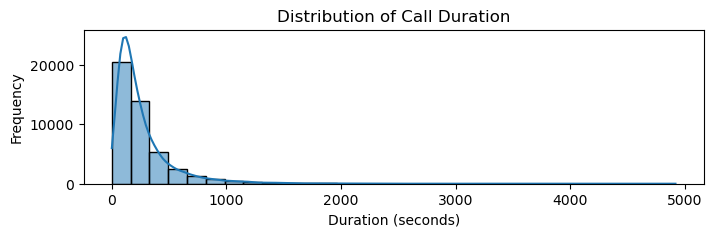

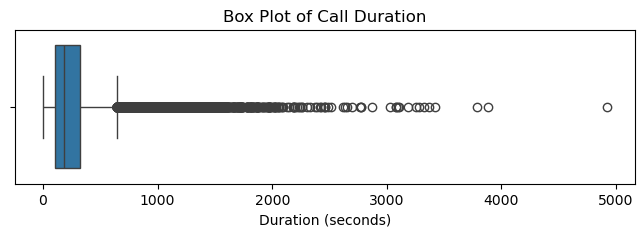

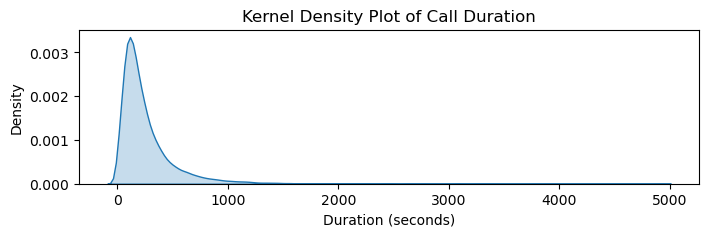

In [45]:
# Distribution of the call_duration varible for visualization: 
# Histogram
plt.figure(figsize=(8, 2))
sns.histplot(df['duration_in_second'], kde=True, bins=30)
plt.title('Distribution of Call Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['duration_in_second'])
plt.title('Box Plot of Call Duration')
plt.xlabel('Duration (seconds)')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 2))
sns.kdeplot(df['duration_in_second'], shade=True)
plt.title('Kernel Density Plot of Call Duration')
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.show()

* Interpret the visualizations:
  >
 1. Histograms give the distribution and frequency of values.
 2. Box plots help in identifying outliers and the spread of the data.
 3. Kernel density plots provide a smoothed estimate of the distribution, helping to identify the shape of the distribution.

## <font color=yellow> **4). Bivariate Analysis**

In [48]:
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0


### <font color=skycolor> **A). Evaluate the relationship between independent variables and the target variable.**

### Bivariate Analysis for Numerical Variables
> - For numerical variables, we can use correlation and visualizations like scatter plots or box plots.

In [51]:
# Extract year and month from the date column
df['year'] = df['date'].dt.year
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017



Correlation with customers who has been targeted :
 age         0.113262
salary     -0.222868
balance    -0.040699
day        -0.012891
year             NaN
pdays      -0.004350
campaign   -0.002597
previous   -0.013253
year             NaN
dtype: float64


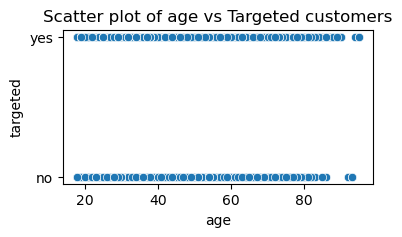

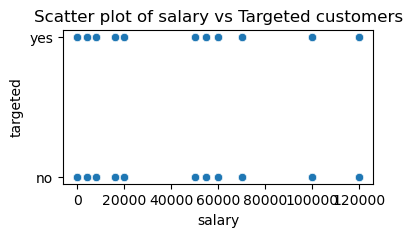

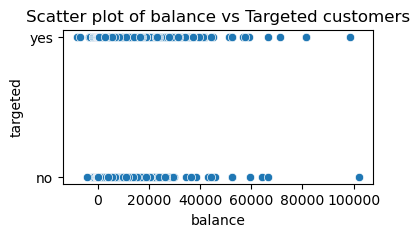

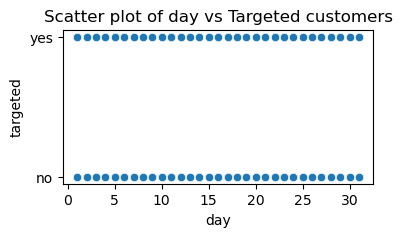

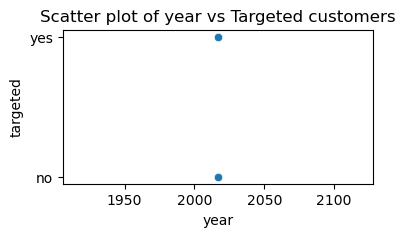

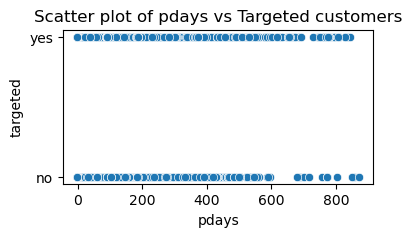

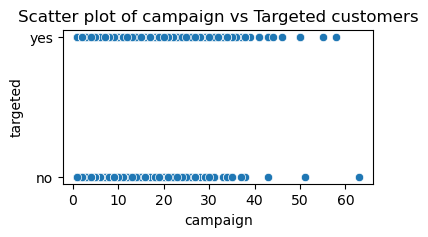

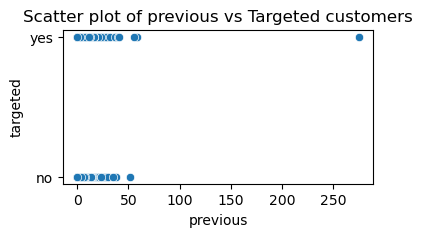

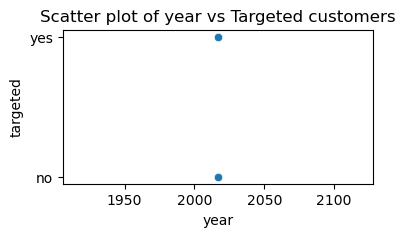


Box plot for numerical variables :



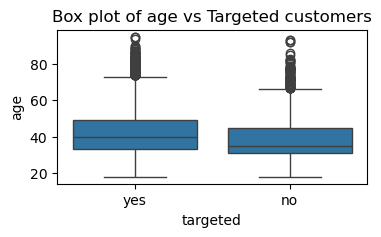

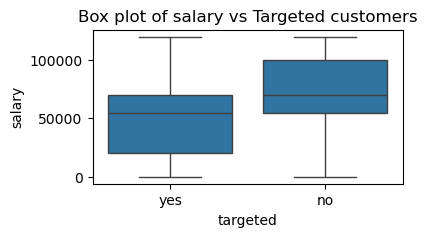

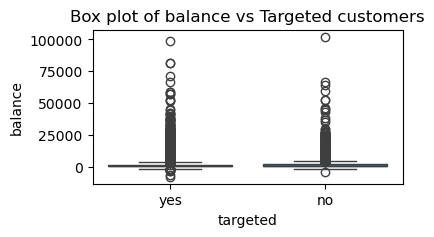

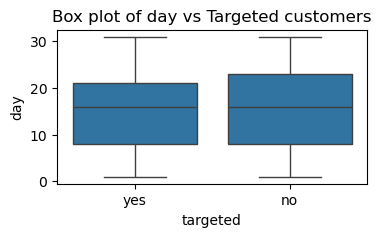

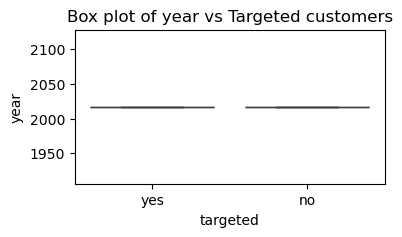

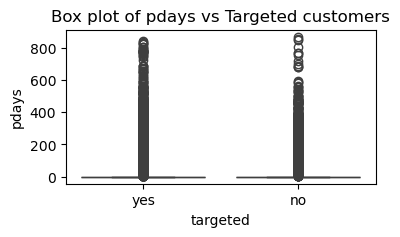

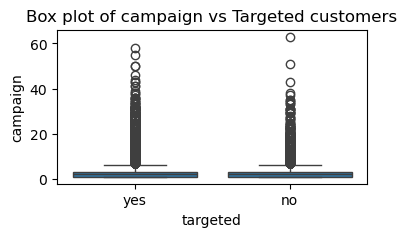

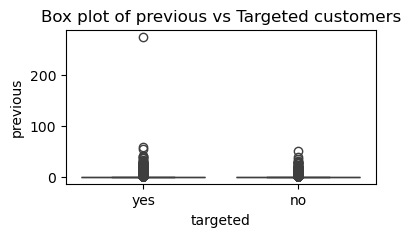

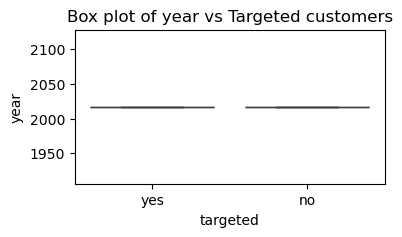

In [52]:
# Numerical columns
num_var = df[['age','salary','balance','day','month','year','pdays','campaign','previous','year']]
# List of numerical columns
numerical_cols = num_var.select_dtypes(include="number").columns

# Correlation with the target variable
correlations = df[numerical_cols].corrwith(df['targeted'].apply(lambda x: 1 if x == 'yes' else 0))
print("\nCorrelation with customers who has been targeted :\n",correlations)

# Scatter plot for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(4,2))
    sns.scatterplot(x=df[col], y=df['targeted'])
    plt.title(f'Scatter plot of {col} vs Targeted customers')
    plt.show()

print("\nBox plot for numerical variables :\n")
# Box plot for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df['targeted'], y=df[col])
    plt.title(f'Box plot of {col} vs Targeted customers')
    plt.show()


#### Bivariate Analysis for Categorical Variables
>- For categorical variables, we can use crosstabs and visualizations like bar plots or count plots.

In [54]:
# Spliting variable into two different variables
 
df['job'] = df['jobedu'].str.split(",").str[0]
df['education'] = df['jobedu'].str.split(",").str[1]
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017,entrepreneur,secondary


In [55]:
# Categorical columns
str_var = df[['marital','job','education','contact','default','housing','loan','response','poutcome']]


Crosstab for marital:
 response     no   yes
marital              
divorced   4585   622
married   24460  2754
single    10879  1911


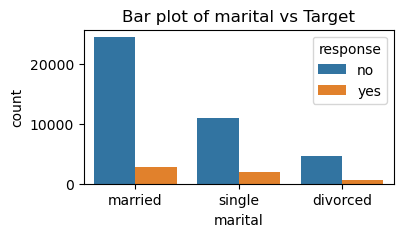


Crosstab for job:
 response         no   yes
job                      
admin.         4541   630
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1393   186
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34


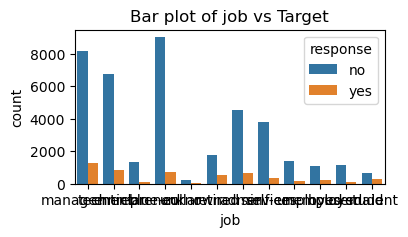


Crosstab for education:
 response      no   yes
education             
primary     6260   591
secondary  20753  2449
tertiary   11306  1995
unknown     1605   252


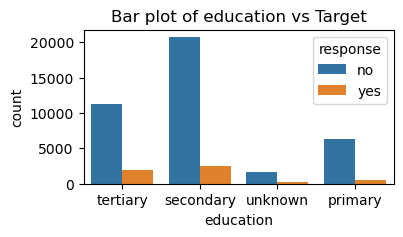


Crosstab for contact:
 response      no   yes
contact               
cellular   24918  4367
telephone   2516   390
unknown    12490   530


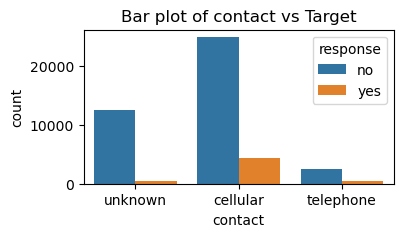


Crosstab for default:
 response     no   yes
default              
no        39161  5235
yes         763    52


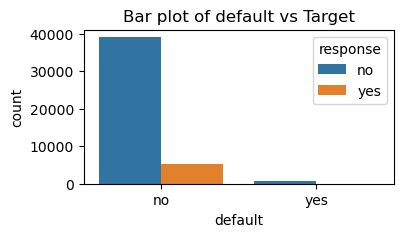


Crosstab for housing:
 response     no   yes
housing              
no        16728  3353
yes       23196  1934


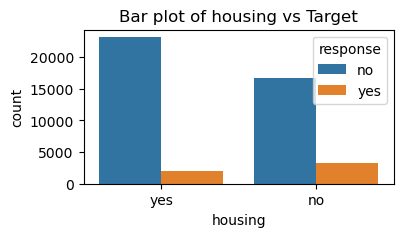


Crosstab for loan:
 response     no   yes
loan                 
no        33164  4803
yes        6760   484


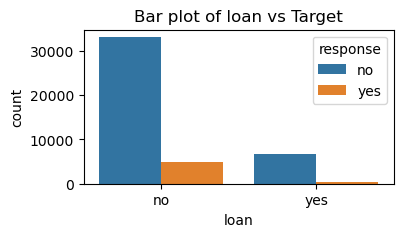


Crosstab for poutcome:
 response     no   yes
poutcome             
failure    4283   618
other      1533   307
success     533   978
unknown   33575  3384


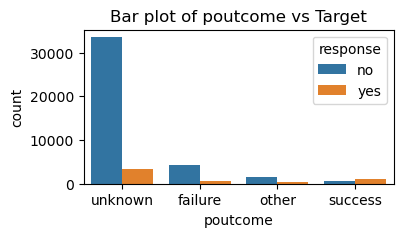

In [56]:
# List of categorical columns
categorical_cols = str_var.select_dtypes(include=['object']).columns

# Crosstabs and Bar plots for categorical variables
for col in categorical_cols:
    if col != 'response':
        crosstab = pd.crosstab(df[col], df['response'])
        print(f'\nCrosstab for {col}:\n', crosstab)
        
        # Bar plot
        plt.figure(figsize=(4, 2))
        sns.countplot(x=col, hue='response', data=df)
        plt.title(f'Bar plot of {col} vs Target')
        plt.show()


#### Interpret the Results
- `Correlation:`
  > - The correlation values tell us the what kind of strength and direction of the relationship between numerical features and the target variable.
  > - The result is there are very weak relation between independent variable and targeted variable. 
- Establish the relationship between numerical variables and the target variable through the scatter plot and box plot.
- Crosstabs shows us the distribution of the target variable within each category of the independent variables. Bar plots give a visual representation of this distribution.
 

#### <font color=skycolor> **B). Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, using visualizations like bar charts, stacked bar charts, and heat maps.**

In [59]:
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,management,tertiary
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,technician,secondary
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017,entrepreneur,secondary


### Bar Chart: 
> Analyze individual categorical features against the target variable.


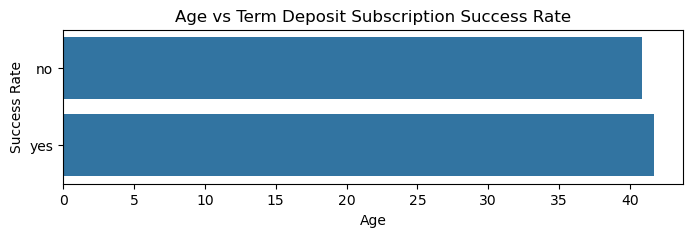

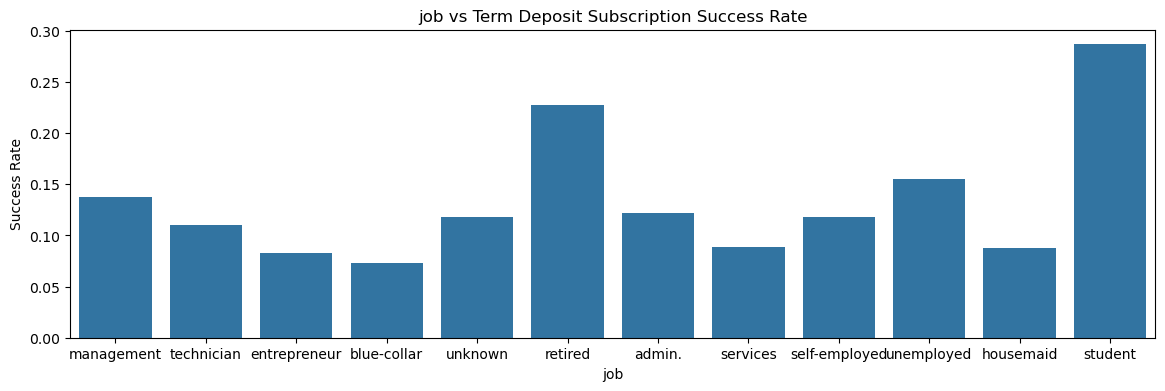

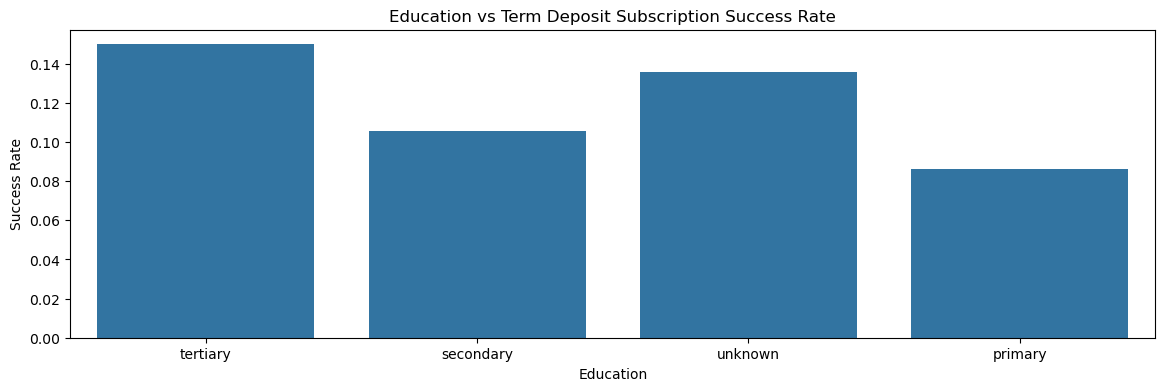

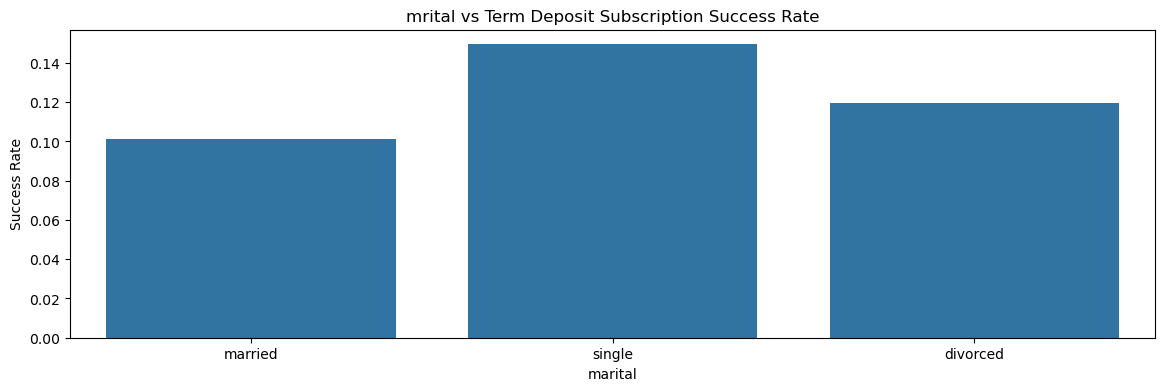

In [61]:
# Convert 'yes' and 'no' to binary for easier analysis
df['Response'] = df['response'].map({'yes': 1, 'no': 0})

# Plot the bar chart for Age vs Term Deposit
plt.figure(figsize=(8, 2))
sns.barplot(x='age', y='response', data=df, ci=None)
plt.title('Age vs Term Deposit Subscription Success Rate')
plt.xlabel('Age')
plt.ylabel('Success Rate')
plt.show()

# Plot the bar chart for job types vs Term Deposit
plt.figure(figsize=(14, 4))
sns.barplot(x='job', y='Response', data=df, ci=None)
plt.title('job vs Term Deposit Subscription Success Rate')
plt.xlabel('job')
plt.ylabel('Success Rate')
plt.show()

# Plot the bar chart for education vs Term Deposit
plt.figure(figsize=(14, 4))
sns.barplot(x='education', y='Response', data=df, ci=None)
plt.title('Education vs Term Deposit Subscription Success Rate')
plt.xlabel('Education')
plt.ylabel('Success Rate')
plt.show()

# Plot the bar chart for marital status vs Term Deposit
plt.figure(figsize=(14, 4))
sns.barplot(x='marital', y='Response', data=df, ci=None)
plt.title('mrital vs Term Deposit Subscription Success Rate')
plt.xlabel('marital')
plt.ylabel('Success Rate')
plt.show()

### Stacked Bar Chart: 
> - Show the distribution of success and failure within each category.

<Figure size 400x400 with 0 Axes>

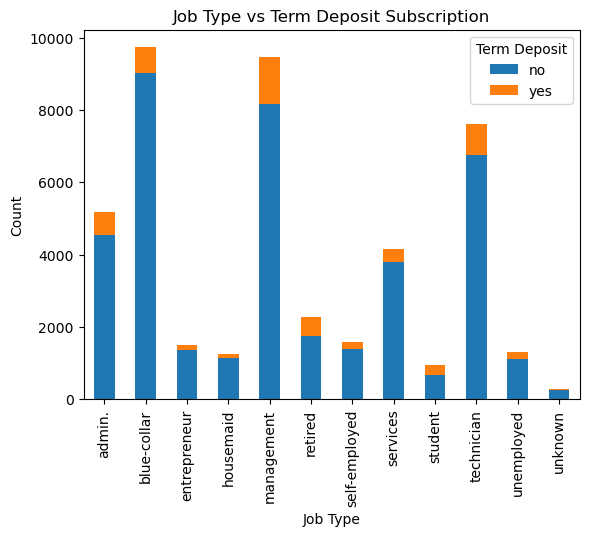

<Figure size 400x400 with 0 Axes>

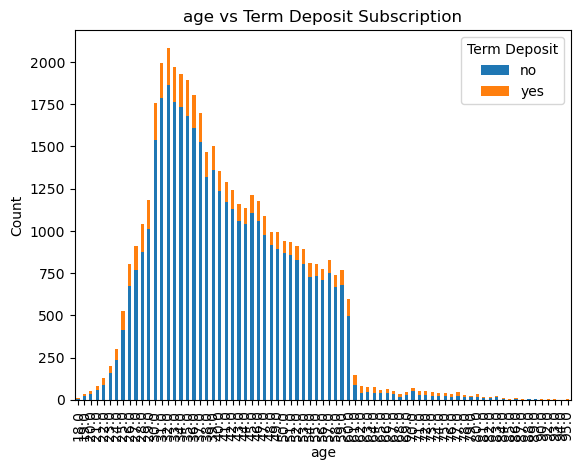

<Figure size 400x400 with 0 Axes>

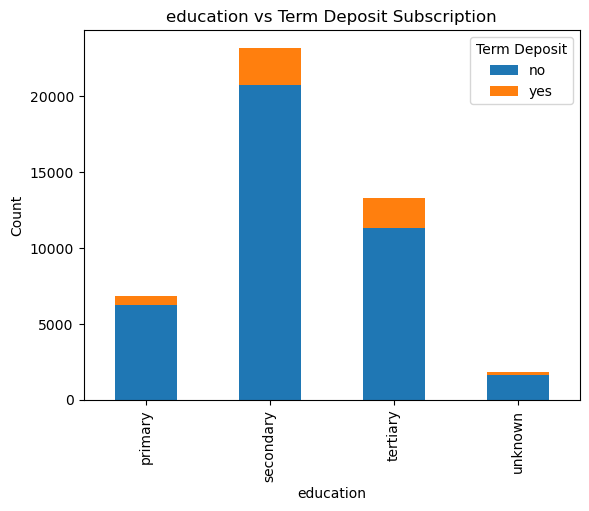

<Figure size 400x400 with 0 Axes>

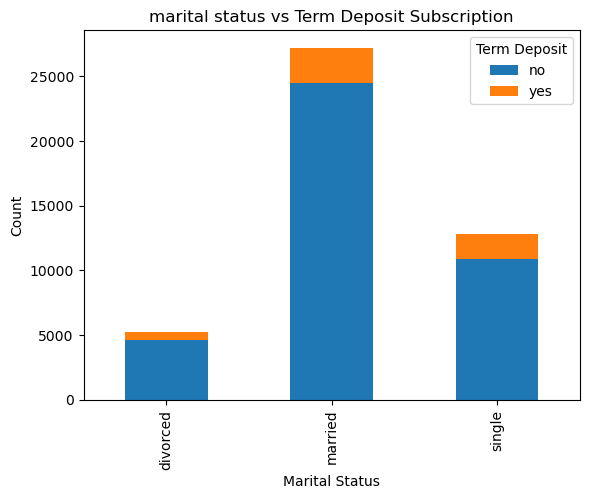

In [63]:
# Job Type vs. Term Deposit response into how different job types perform in the campaign.
plt.figure(figsize=(4,4))
pd.crosstab(df['job'], df['response']).plot(kind='bar', stacked=True)
plt.title('Job Type vs Term Deposit Subscription')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Term Deposit')
plt.show()

# Age vs. Term Deposit response into how different job types perform in the campaign.
plt.figure(figsize=(4,4))
pd.crosstab(df['age'], df['response']).plot(kind='bar', stacked=True)
plt.title('age vs Term Deposit Subscription')
plt.xlabel('age')
plt.ylabel('Count')
plt.legend(title='Term Deposit')
plt.show()

# Education Type vs. Term Deposit response into how different job types perform in the campaign.
plt.figure(figsize=(4,4))
pd.crosstab(df['education'], df['response']).plot(kind='bar', stacked=True)
plt.title('education vs Term Deposit Subscription')
plt.xlabel('education')
plt.ylabel('Count')
plt.legend(title='Term Deposit')
plt.show()

# Marital Status vs. Term Deposit response into how different job types perform in the campaign.
plt.figure(figsize=(4,4))
pd.crosstab(df['marital'], df['response']).plot(kind='bar', stacked=True)
plt.title('marital status vs Term Deposit Subscription')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Term Deposit')
plt.show()


### Heatmap:
+ > Correlation Between Age, Education, and Term Deposit
  > - For numerical variables, we can use a heatmap to show the correlation between different features, such as age, education, and the success of the term deposit campaign.

In [65]:
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education,Response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,management,tertiary,0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,technician,secondary,0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017,entrepreneur,secondary,0


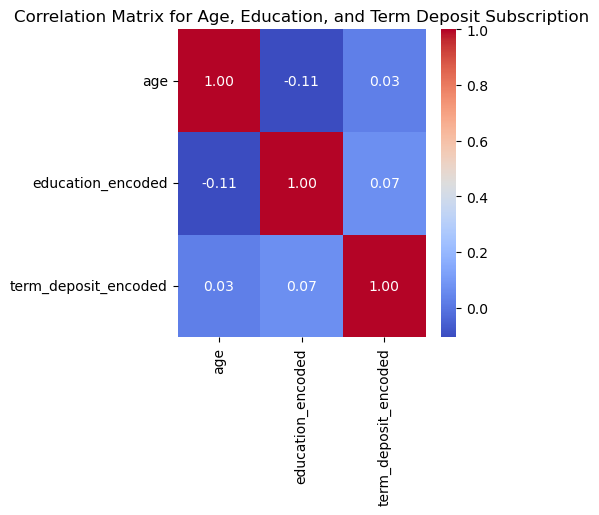

In [66]:
# Convert categorical education and term_deposit into numerical variables
df['education_encoded'] = df['education'].astype('category').cat.codes
df['term_deposit_encoded'] = df['response'].map({'yes': 1, 'no': 0})

# Create a correlation matrix
corr_matrix = df[['age', 'education_encoded', 'term_deposit_encoded']].corr()

# Plot heat map
plt.figure(figsize=(4, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',cbar=True)
plt.title('Correlation Matrix for Age, Education, and Term Deposit Subscription')
plt.show()

> Very weak or no correlation  between different features, such as age, education, and the success of the term deposit campaign.

#### **Job Type and Marital Status:**
> * **Stacked Bar Chart**
    - We can also analyze the joint effect of two categorical features like job type and marital status.

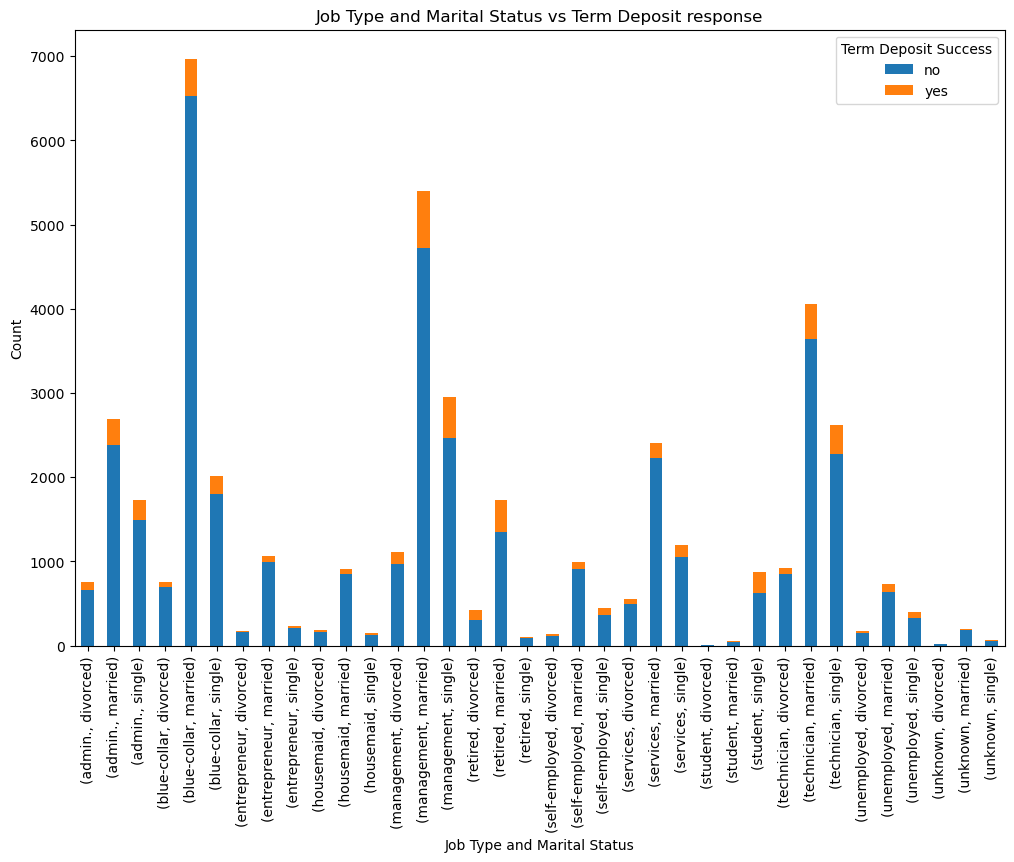

In [69]:
# Crosstab for Job Type and Marital Status vs Term Deposit
job_marital_vs_term = pd.crosstab([df['job'], df['marital']], df['response'])

# Plot stacked bar chart
job_marital_vs_term.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Job Type and Marital Status vs Term Deposit response')
plt.xlabel('Job Type and Marital Status')
plt.ylabel('Count')
plt.legend(title='Term Deposit Success')
plt.show()


## <font color=yellow> **5). Categorical Variables Analysis**

#### <font color=skycolor> **A). Investigate the distribution of categorical variables such as job type, education, and marital status.**
> - Distribution of categorical variables
> - Visualizing the distributions*

In [72]:
# Job distribution
print("\nDistribution of Job variable :\n\n",df['job'].value_counts())

# Education distribution
print("\nDistribution of Education variable :\n\n",df['education'].value_counts())

# Marital status distribution
print("\nDistribution of Marital status variable :\n\n",df['marital'].value_counts())


Distribution of Job variable :

 job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Distribution of Education variable :

 education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Distribution of Marital status variable :

 marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64



Visualizing the Distribution :




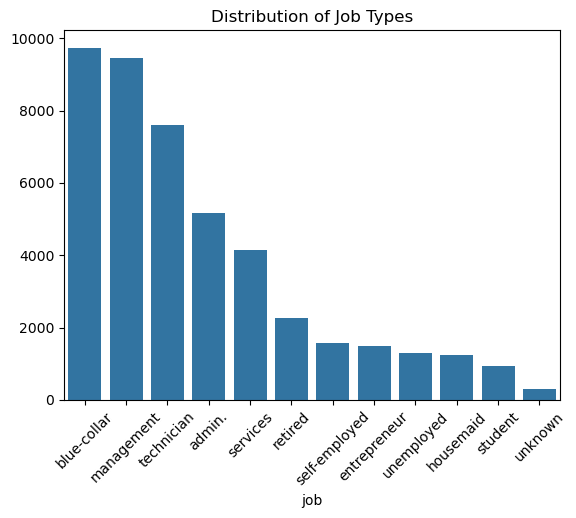

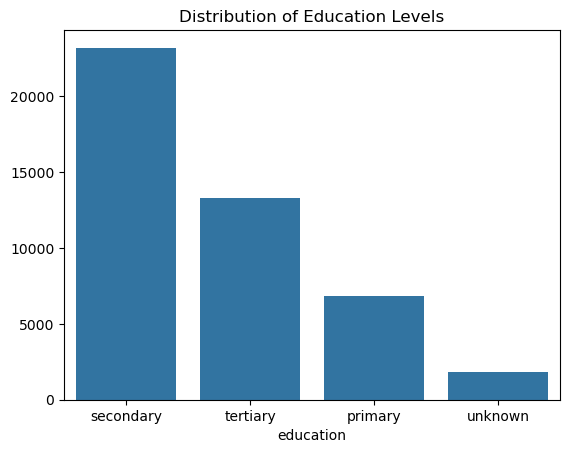

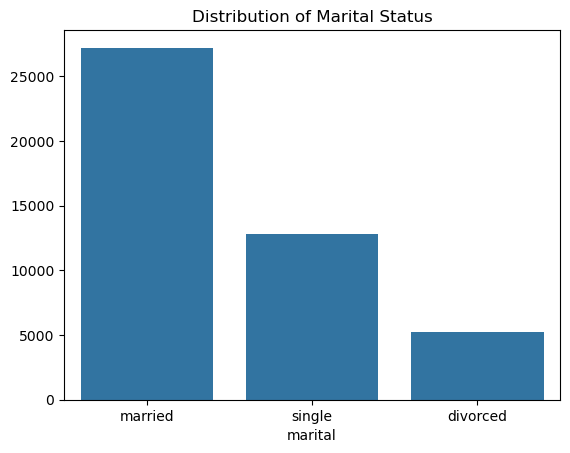

In [73]:
print("\nVisualizing the Distribution :\n\n")
# Distribution of job type
job_counts = df['job'].value_counts()
sns.barplot(x=job_counts.index, y=job_counts.values)
plt.xticks(rotation=45)
plt.title('Distribution of Job Types')
plt.show()

# Distribution of education
education_counts = df['education'].value_counts()
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Distribution of Education Levels')
plt.show()

# Distribution of marital status
marital_counts = df['marital'].value_counts()
sns.barplot(x=marital_counts.index, y=marital_counts.values)
plt.title('Distribution of Marital Status')
plt.show()

#### <font color=skycolor> **B). Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.**

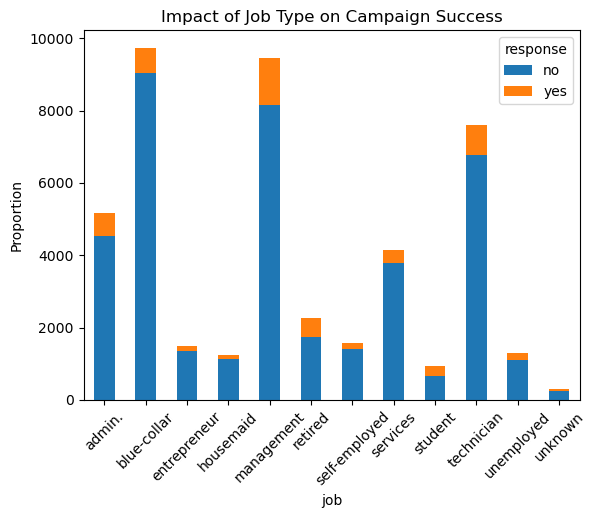

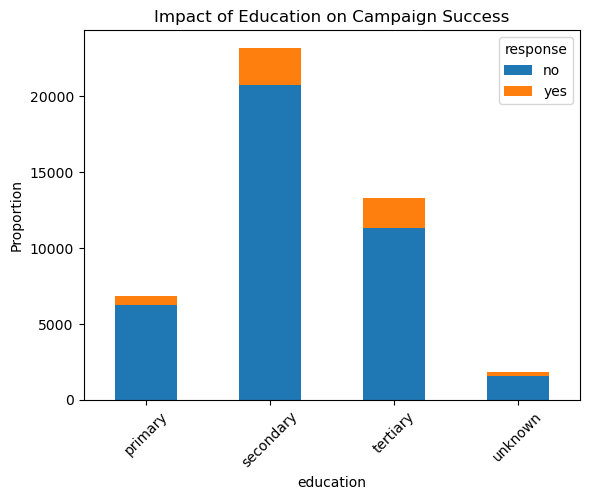

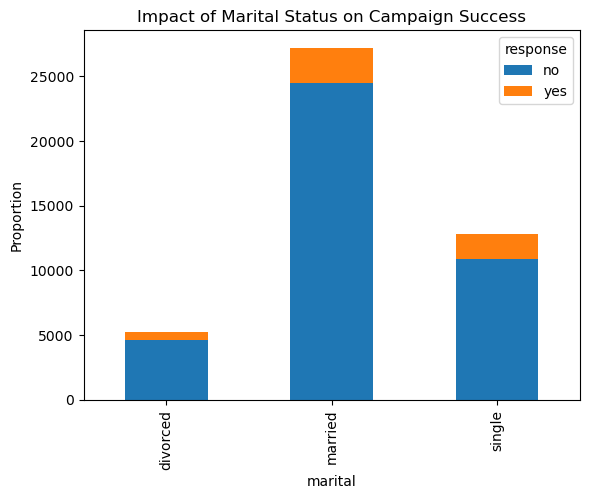

In [75]:
# Impact of job type on campaign success
job_success = df.groupby('job')['response'].value_counts().unstack()
job_success.plot(kind='bar', stacked=True)
plt.title('Impact of Job Type on Campaign Success')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

# Impact of education on campaign success
education_success = df.groupby('education')['response'].value_counts().unstack()
education_success.plot(kind='bar', stacked=True)
plt.title('Impact of Education on Campaign Success')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

# Impact of marital status on campaign success
marital_success = df.groupby('marital')['response'].value_counts().unstack()
marital_success.plot(kind='bar', stacked=True)
plt.title('Impact of Marital Status on Campaign Success')
plt.ylabel('Proportion')
plt.show()


- Here's we have analyzed that what's the impact on these categorical variable such as 'job_type', 'education' and 'marital status'
- After analyze we found that campaign is not successful.

## <font color=yellow> **6). Temporal Analysis**

In [78]:
df.head(4)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education,Response,education_encoded,term_deposit_encoded
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,management,tertiary,0,2,0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,technician,secondary,0,1,0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017,entrepreneur,secondary,0,1,0
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,2017-05-05,92,sec,92.0,2017,blue-collar,unknown,0,3,0


#### <font color=skycolor> **A). Investigate temporal patterns in the success of the campaign over time.**

In [80]:
# Extract month and day_of_week from datetime variable
df['Month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['month_name'] = pd.to_datetime(df['Month'], format='%m').dt.strftime('%B')

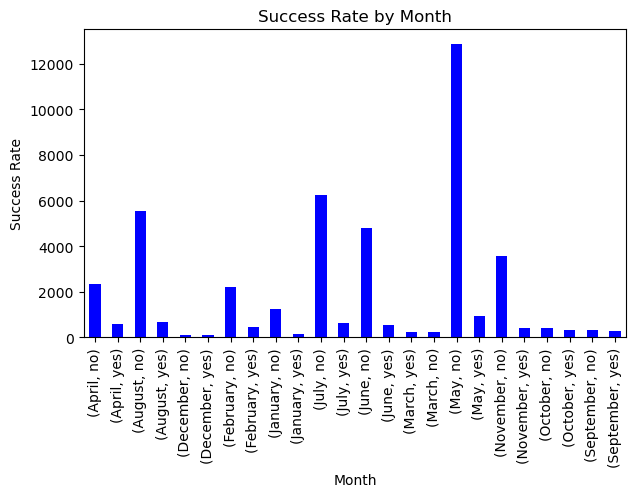

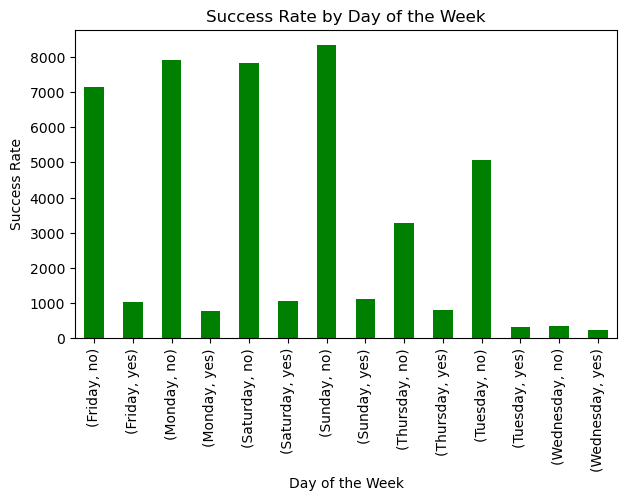

In [81]:
# Group by month and calculate success rate
monthly_success_rate = df.groupby('month_name')['response'].value_counts()

# Visualize the success rate by month
plt.figure(figsize=(7,4))
monthly_success_rate.plot(kind='bar', color='blue')
plt.title('Success Rate by Month')
plt.xlabel('Month')
plt.ylabel('Success Rate')
plt.show()

# Group by day of the week and calculate success rate
weekly_success_rate = df.groupby('day_of_week')['response'].value_counts()

# Visualize the success rate by day of the week
plt.figure(figsize=(7,4))
weekly_success_rate.plot(kind='bar', color='green')
plt.title('Success Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Success Rate')
plt.show()

#### Interpretation:
* Look for trends or recurring patterns in the data related to time.
> - The success rate of the campaign over time is almost not successful because maximum response found against the day of the week are 'YES'.
> - The success rate of the campaign by month, maximum response given as 'NO' and 'March','September','October' and 'December' have neutral response.

#### <font color=skycolor> **B). Analyze if specific months or days exhibit superior campaign performance.**
> + Aggregation of the data to analyze the performance of the campaign based on the target column.

In [84]:
# Convert response to yes/no = 1/0, for calculating success rate
df['success_rate'] = df['response'].map({'yes': 1, 'no': 0})

In [85]:
# 'Response' is the column indicating campaign success (e.g., 1 for success, 0 for failure)
# Group by 'month' and/or 'day' and calculate the success rate
monthly_performance = df.groupby(df['date'].dt.month)['success_rate'].mean().reset_index()
daily_performance = df.groupby(df['date'].dt.day)['success_rate'].mean().reset_index()

# Rename columns for clarity
monthly_performance.columns = ['Month', 'Success_Rate']
daily_performance.columns = ['Day', 'Success_Rate']

print("\nGrouped day by mean of the success rate :\n",daily_performance)
print("\nGrouped month with the mean of the success rate :\n",monthly_performance)


Grouped day by mean of the success rate :
     Day  Success_Rate
0     1      0.279503
1     2      0.140758
2     3      0.164345
3     4      0.159501
4     5      0.112683
5     6      0.093734
6     7      0.086501
7     8      0.109358
8     9      0.114817
9    10      0.230916
10   11      0.121786
11   12      0.151780
12   13      0.152339
13   14      0.113883
14   15      0.139349
15   16      0.135881
16   17      0.090815
17   18      0.097222
18   19      0.069555
19   20      0.069793
20   21      0.099308
21   22      0.169248
22   23      0.134328
23   24      0.138702
24   25      0.158522
25   26      0.112077
26   27      0.134048
27   28      0.078142
28   29      0.074010
29   30      0.173163
30   31      0.071651

Grouped month with the mean of the success rate :
     Month  Success_Rate
0       1      0.101284
1       2      0.165911
2       3      0.518908
3       4      0.196861
4       5      0.067406
5       6      0.101968
6       7      0.090883
7       

In [86]:
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education,Response,education_encoded,term_deposit_encoded,Month,day_of_week,month_name,success_rate
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,management,tertiary,0,2,0,5,Friday,May,0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,technician,secondary,0,1,0,5,Friday,May,0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017,entrepreneur,secondary,0,1,0,5,Friday,May,0


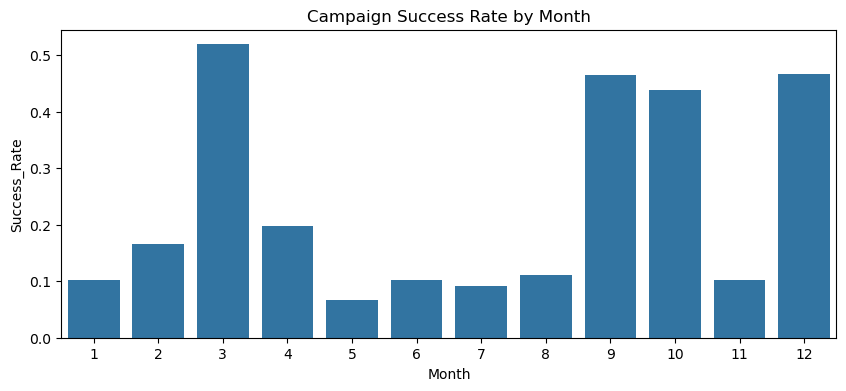

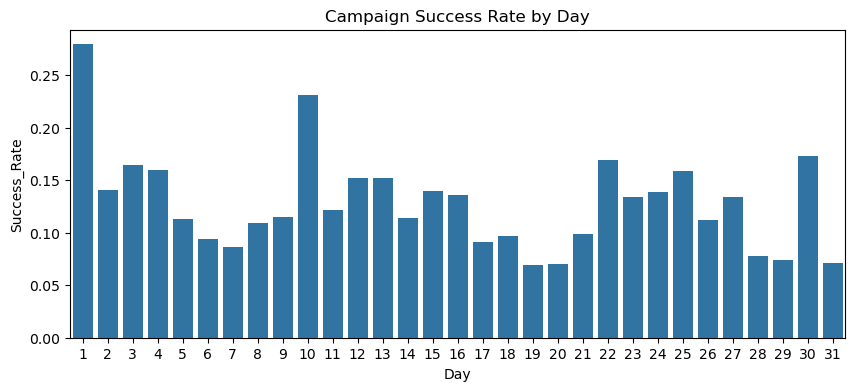

In [87]:
# Monthly performance plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Month', y='Success_Rate', data=monthly_performance)
plt.title('Campaign Success Rate by Month')
plt.show()

# Daily performance plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Day', y='Success_Rate', data=daily_performance)
plt.title('Campaign Success Rate by Day')
plt.show()

####  Interpret the Results:
> > Peak Months:
> > - Analyze march, september, october and december month show a higher success rate. These months could be more effective for future campaigns.

> > Optimal Days:
  > > - Similarly, Here we have observed that the 1st days, 10th days, 22nd, 25th and 30th days perform better.

## <font color=yellow> **7). Feature Engineering**

In [90]:
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education,Response,education_encoded,term_deposit_encoded,Month,day_of_week,month_name,success_rate
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,management,tertiary,0,2,0,5,Friday,May,0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,technician,secondary,0,1,0,5,Friday,May,0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017,entrepreneur,secondary,0,1,0,5,Friday,May,0


#### <font color=skycolor> **A). Introduce new features that may enhance prediction, such as creating age groups or income categories.**

#### Creating Age Category :
+ Categorization customers into age groups
>- Youth: 18-25
>- Young Adults: 26-35
>- Middle-Aged Adults: 36-50
>- Seniors: 51+

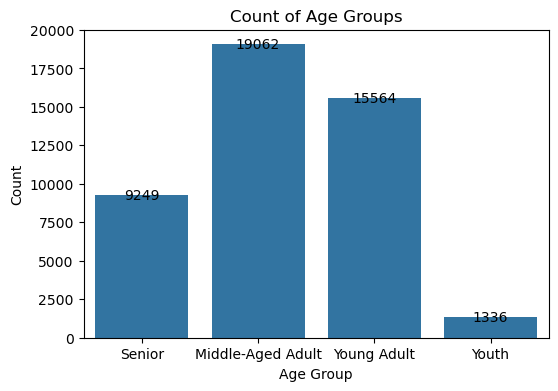

In [93]:
# Assuming your DataFrame is called df and there's an 'age' column
def categorize_age(age):
    if age < 26:
        return 'Youth'
    elif 26 <= age <= 35:
        return 'Young Adult'
    elif 36 <= age <= 50:
        return 'Middle-Aged Adult'
    else:
        return 'Senior'

df['age_group'] = df['age'].apply(categorize_age)

plt.figure(figsize=(6,4))
ax = sns.countplot(x="age_group", data=df)

# add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='center')

plt.title("Count of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


#### Creating Salary Category:
>- Low: < 20,000
>- Middle: 20,000 - 50,000
>- High: > 50,000

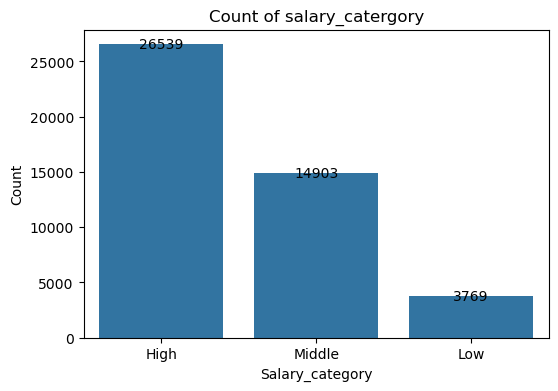

In [95]:
def categorize_income(salary):
    if salary < 20000:
        return 'Low'
    elif 20000 <= salary <= 50000:
        return 'Middle'
    else:
        return 'High'

df['salary_category'] = df['salary'].apply(categorize_income)

plt.figure(figsize=(6,4))
ax = sns.countplot(x="salary_category", data=df)

# add count labels on top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.0f}', ha='center', va='center')

plt.title("Count of salary_catergory")
plt.xlabel("Salary_category")
plt.ylabel("Count")
plt.show()


#### Creating Duration Category:
> - Short: < 100 seconds
> - Medium: 100 - 300 seconds
> - Long: > 300 seconds

In [97]:
def categorize_duration(duration_in_second):
    if duration_in_second < 100:
        return 'Short'
    elif 100 <= duration_in_second <= 300:
        return 'Medium'
    else:
        return 'Long'

df['duration_in_second_category'] = df['duration_in_second'].apply(categorize_duration)


#### Number of Contacts in Previous Campaign:
> - In this column we can group the number of contacts made in previous campaigns.

In [99]:
def categorize_contacts(campaign):
    if campaign == 0:
        return 'No Previous Contact'
    elif 1 <= campaign <= 3:
        return 'Few Contacts'
    else:
        return 'Many Contacts'

df['contact_category'] = df['campaign'].apply(categorize_contacts)

#### <font color=skycolor> **B). Apply encoding techniques to transform categorical variables if necessary.**

In [101]:
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education,Response,education_encoded,term_deposit_encoded,Month,day_of_week,month_name,success_rate,age_group,salary_category,duration_in_second_category,contact_category
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,management,tertiary,0,2,0,5,Friday,May,0,Senior,High,Medium,Few Contacts
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,technician,secondary,0,1,0,5,Friday,May,0,Middle-Aged Adult,High,Medium,Few Contacts
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017,entrepreneur,secondary,0,1,0,5,Friday,May,0,Young Adult,High,Short,Few Contacts


In [102]:
# Copy of the variables [job and eduacation]
df['Job'] = df['job'].copy()
df['Education'] = df['education'].copy()
df['Marital'] = df['marital'].copy()
df['Contact'] = df['contact'].copy()
df['Poutcome'] = df['poutcome'].copy()
df['day_of_week_1'] = df['day_of_week'].copy()
df.head(2)


,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job,education,Response,education_encoded,term_deposit_encoded,Month,day_of_week,month_name,success_rate,age_group,salary_category,duration_in_second_category,contact_category,Job,Education,Marital,Contact,Poutcome,day_of_week_1
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,management,tertiary,0,2,0,5,Friday,May,0,Senior,High,Medium,Few Contacts,management,tertiary,married,unknown,unknown,Friday
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,technician,secondary,0,1,0,5,Friday,May,0,Middle-Aged Adult,High,Medium,Few Contacts,technician,secondary,single,unknown,unknown,Friday


In [103]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
# Examine unique values in categorical columns

# High cardinality, use Binary Encoding
print("\nUnique value for Job column :\n\n",df['job'].unique())
# Potentially high cardinality, use Binary Encoding
print("\nUnique value for Education column :\n\n",df['education'].unique())
# Low cardinality, use One-Hot Encoding
print("\nUnique value for Marital column :\n\n",df['marital'].unique()) 
# Low cardinality, use One-Hot Encoding
print("\nUnique value for Contact column :\n\n",df['contact'].unique())
# Could have multiple categories, use One-Hot Encoding
print("\nUnique value for POutcome column :\n\n",df['poutcome'].unique()) 
# Ordered, use Label Encoding
print("\nUnique value for Month column :\n\n",df['month_name'].unique())
# Ordered, use Label Encoding
print("\nUnique value for day_of_week column :\n\n",df['day_of_week'].unique()) 

# Apply Binary Encoding to high-cardinality categorical variables
binary_encoder = ce.BinaryEncoder(cols=['job', 'education'])
df = binary_encoder.fit_transform(df)

# Apply One-Hot Encoding to low-cardinality categorical variables
df = pd.get_dummies(df, columns=['Marital', 'Contact', 'Poutcome'])

# Apply Label Encoding to ordered categorical variables like 'month' and 'day_of_week'
label_encoder_month = LabelEncoder()
df['month'] = label_encoder_month.fit_transform(df['month'])

label_encoder_day = LabelEncoder()
df['day_of_week_1'] = label_encoder_day.fit_transform(df['day_of_week_1'])


Unique value for Job column :

 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Unique value for Education column :

 ['tertiary' 'secondary' 'unknown' 'primary']

Unique value for Marital column :

 ['married' 'single' 'divorced']

Unique value for Contact column :

 ['unknown' 'cellular' 'telephone']

Unique value for POutcome column :

 ['unknown' 'failure' 'other' 'success']

Unique value for Month column :

 ['May' 'June' 'July' 'August' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'September']

Unique value for day_of_week column :

 ['Friday' 'Monday' 'Saturday' 'Sunday' 'Tuesday' 'Wednesday' 'Thursday']


In [104]:
# Check the final dataframe
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job_0,job_1,job_2,job_3,education_0,education_1,education_2,Response,education_encoded,term_deposit_encoded,Month,day_of_week,month_name,success_rate,age_group,salary_category,duration_in_second_category,contact_category,Job,Education,day_of_week_1,Marital_divorced,Marital_married,Marital_single,Contact_cellular,Contact_telephone,Contact_unknown,Poutcome_failure,Poutcome_other,Poutcome_success,Poutcome_unknown
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,8,261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,0,0,0,1,0,0,1,0,2,0,5,Friday,May,0,Senior,High,Medium,Few Contacts,management,tertiary,0,False,True,False,False,False,True,False,False,False,True
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,8,151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,0,0,1,0,0,1,0,0,1,0,5,Friday,May,0,Middle-Aged Adult,High,Medium,Few Contacts,technician,secondary,0,False,False,True,False,False,True,False,False,False,True
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,8,76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017,0,0,1,1,0,1,0,0,1,0,5,Friday,May,0,Young Adult,High,Short,Few Contacts,entrepreneur,secondary,0,False,True,False,False,False,True,False,False,False,True
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,8,92 sec,1,-1,0,unknown,no,2017-05-05,92,sec,92.0,2017,0,1,0,0,0,1,1,0,3,0,5,Friday,May,0,Middle-Aged Adult,Middle,Short,Few Contacts,blue-collar,unknown,0,False,True,False,False,False,True,False,False,False,True
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,8,198 sec,1,-1,0,unknown,no,2017-05-05,198,sec,198.0,2017,0,1,0,1,0,1,1,0,3,0,5,Friday,May,0,Young Adult,Low,Medium,Few Contacts,unknown,unknown,0,False,False,True,False,False,True,False,False,False,True


In [105]:
# groupby function for calculating high-cardinality in job category variable
df['Job'].value_counts().reset_index(name='Counts')

,Job,Counts
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154
5,retired,2264
6,self-employed,1579
7,entrepreneur,1487
8,unemployed,1303
9,housemaid,1240


In [106]:
# groupby function for calculating high-cardinality in education category variable
df['Education'].value_counts().reset_index(name='Counts')

,Education,Counts
0,secondary,23202
1,tertiary,13301
2,primary,6851
3,unknown,1857


## <font color=yellow> **8). Correlation Analysis**
>- Describe the relation in each variable

#### <font color= skycolor> **A). Examine correlations between independent variables to identify multicollinearity.**


In [110]:
df.head(2)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job_0,job_1,job_2,job_3,education_0,education_1,education_2,Response,education_encoded,term_deposit_encoded,Month,day_of_week,month_name,success_rate,age_group,salary_category,duration_in_second_category,contact_category,Job,Education,day_of_week_1,Marital_divorced,Marital_married,Marital_single,Contact_cellular,Contact_telephone,Contact_unknown,Poutcome_failure,Poutcome_other,Poutcome_success,Poutcome_unknown
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,8,261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,0,0,0,1,0,0,1,0,2,0,5,Friday,May,0,Senior,High,Medium,Few Contacts,management,tertiary,0,False,True,False,False,False,True,False,False,False,True
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,8,151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,0,0,1,0,0,1,0,0,1,0,5,Friday,May,0,Middle-Aged Adult,High,Medium,Few Contacts,technician,secondary,0,False,False,True,False,False,True,False,False,False,True


In [111]:
# Creating numeric independent variable
x = df[['age','salary','balance','campaign','duration_in_second']]

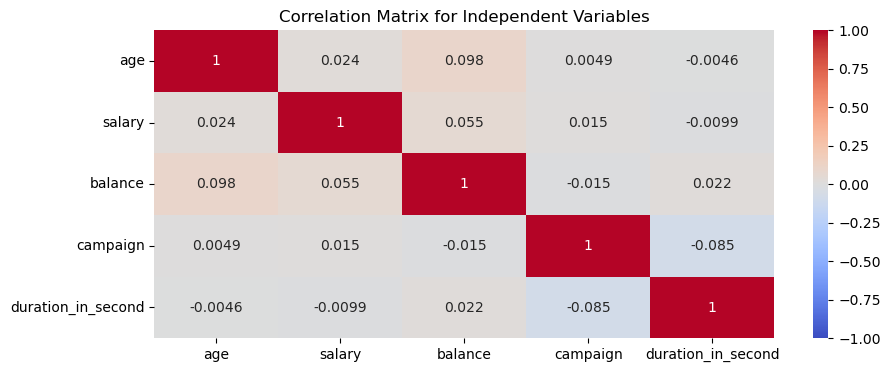

Highly correlated features (possible multicollinearity):
Empty DataFrame
Columns: [age, salary, balance, campaign, duration_in_second]
Index: []


In [112]:
# Calculate the correlation matrix
correlation_matrix = x.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Independent Variables")
plt.show()

# Identify multicollinearity (print highly correlated features)
# Multicollinearity exists when the correlation between two features > 0.8 or < -0.8
high_corr = correlation_matrix[(correlation_matrix > 0.8) & (correlation_matrix < 1.0)]
print("Highly correlated features (possible multicollinearity):")
print(high_corr.dropna(how='all'))

#### <font color=skycolor> **B). Evaluate how correlated features may influence the target variable.**

In [114]:
# Copy the response of the customer as a target_var and converting in binary number(1 for 'yes' and 0 for 'no')
df['target_var'] = df['response'].copy()
df['target_var'] = df['target_var'].map({'yes': 1, 'no': 0})

In [115]:
# creating new var containing integer value
y = df[['age','salary','balance','campaign','duration_in_second','target_var']]

# Convert categorical columns into numeric format using one-hot encoding
df_encoded = pd.get_dummies(y, drop_first=True)  # Drop first to avoid multicollinearity

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Display the correlation of features with the target
print(correlation_matrix['target_var'].sort_values(ascending=False))

target_var            1.000000
duration_in_second    0.394531
balance               0.052895
age                   0.025069
salary                0.020024
campaign             -0.073172
Name: target_var, dtype: float64


#### Filter Highly Correlated Features
- Once we have the correlation values, we can filter out features that have a strong
correlation with the target variable. For example, we might want to focus on correlations greater than 0.5 (strong positive correlation) or less than -0.5 (strong negative correlation).

In [117]:
# Set a correlation threshold, for example, >0.5 or <-0.5
threshold = 0.5

# Filter features with strong correlation to the target
strong_corr = correlation_matrix['target_var'][(correlation_matrix['target_var'] > threshold) | (correlation_matrix['target_var'] < -threshold)]
print("Features strongly correlated with the target:\n", strong_corr)

print('\nThere are no any int variable to identifying the relationship with the target_var.')

Features strongly correlated with the target:
 target_var    1.0
Name: target_var, dtype: float64

There are no any int variable to identifying the relationship with the target_var.


####  Check for Multicollinearity Between Features
- Correlated features among themselves can cause multicollinearity. we can look for pairs of features that are strongly correlated to each other (e.g., correlation > 0.8).

In [119]:
# Check correlations between features
feature_corr_matrix = y.drop('target_var', axis=1).corr()

# Filter pairs of features that are highly correlated
high_corr_features = feature_corr_matrix.unstack().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features != 1]  # Remove self-correlations
high_corr_features = high_corr_features[high_corr_features > 0.8]  # Keep only highly correlated pairs
print("Highly correlated feature pairs:\n", high_corr_features)

print('\nThere are no any variable which have highly correlated pairs.')

Highly correlated feature pairs:
 Series([], dtype: float64)

There are no any variable which have highly correlated pairs.


#### Visualizing Correlation
- Although this step uses some visualization, pandas itself can produce a simple heatmap of the correlations.

In [121]:
# Correlation matrix heatmap using pandas' built-in styling
correlation_matrix.style.background_gradient(cmap='coolwarm')

,age,salary,balance,campaign,duration_in_second,target_var
age,1.000000,0.024366,0.097753,0.004851,-0.004645,0.025069
salary,0.024366,1.000000,0.055469,0.015005,-0.009937,0.020024
balance,0.097753,0.055469,1.000000,-0.014578,0.021560,0.052895
campaign,0.004851,0.015005,-0.014578,1.000000,-0.084570,-0.073172
duration_in_second,-0.004645,-0.009937,0.021560,-0.084570,1.000000,0.394531
target_var,0.025069,0.020024,0.052895,-0.073172,0.394531,1.000000


- Here, we can see that there are ***weak*** relationship between duration variable and target_var variable
- The relationship only in duration and target variable  that called weak relationship.

## <font color=yellow> **9). Outlier Detection and Handling**

In [124]:
df.head(3)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,date,duration_int,sec_str,duration_in_second,year,job_0,job_1,job_2,job_3,education_0,education_1,education_2,Response,education_encoded,term_deposit_encoded,Month,day_of_week,month_name,success_rate,age_group,salary_category,duration_in_second_category,contact_category,Job,Education,day_of_week_1,Marital_divorced,Marital_married,Marital_single,Contact_cellular,Contact_telephone,Contact_unknown,Poutcome_failure,Poutcome_other,Poutcome_success,Poutcome_unknown,target_var
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,8,261 sec,1,-1,0,unknown,no,2017-05-05,261,sec,261.0,2017,0,0,0,1,0,0,1,0,2,0,5,Friday,May,0,Senior,High,Medium,Few Contacts,management,tertiary,0,False,True,False,False,False,True,False,False,False,True,0
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,8,151 sec,1,-1,0,unknown,no,2017-05-05,151,sec,151.0,2017,0,0,1,0,0,1,0,0,1,0,5,Friday,May,0,Middle-Aged Adult,High,Medium,Few Contacts,technician,secondary,0,False,False,True,False,False,True,False,False,False,True,0
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,8,76 sec,1,-1,0,unknown,no,2017-05-05,76,sec,76.0,2017,0,0,1,1,0,1,0,0,1,0,5,Friday,May,0,Young Adult,High,Short,Few Contacts,entrepreneur,secondary,0,False,True,False,False,False,True,False,False,False,True,0


#### <font color=skycolor> **A). Identify and rectify outliers that could impact the analysis and predictions.**

In [126]:
# Creating new data frame of only integer column
num_df = df[['age','balance','duration_in_second','campaign','pdays','previous']]

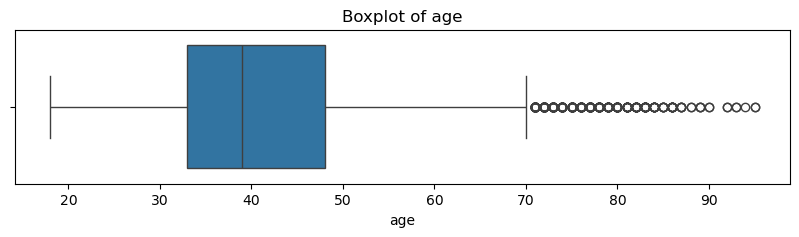

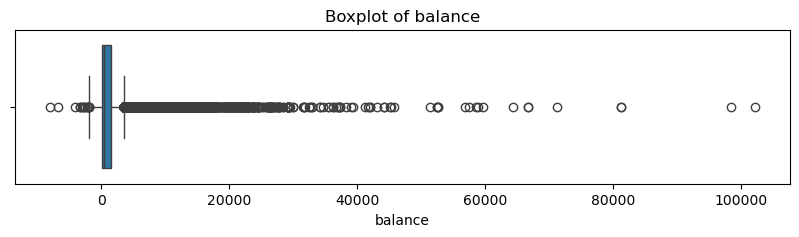

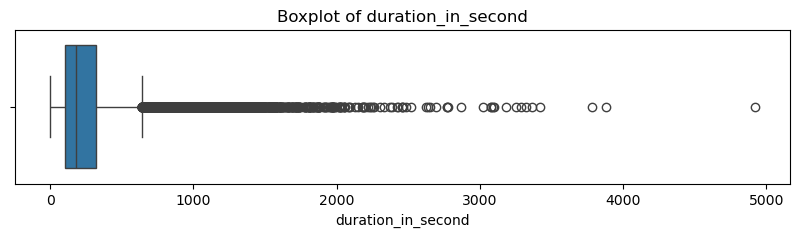

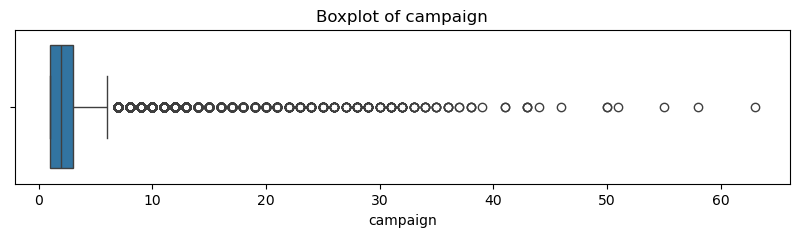

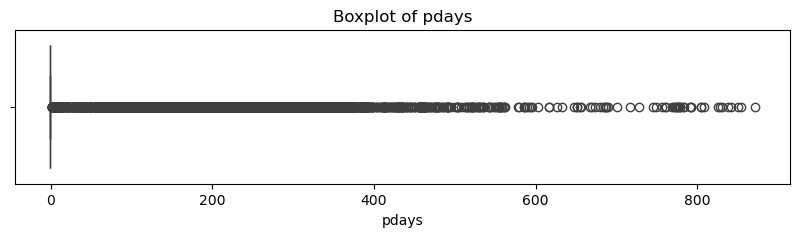

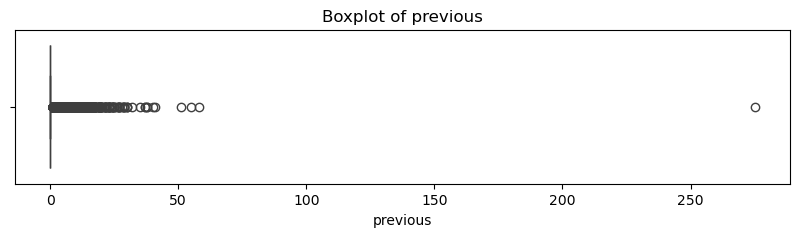

In [127]:
# Visualizing outliers in a numerical column

for column in num_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10,2))
    
    # Boxplot for each numerical column
    sns.boxplot(data=num_df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

 #### Capping method / Flooring method
> - These method use to handle the outliers.
> - Limit extreme values to a certain range.

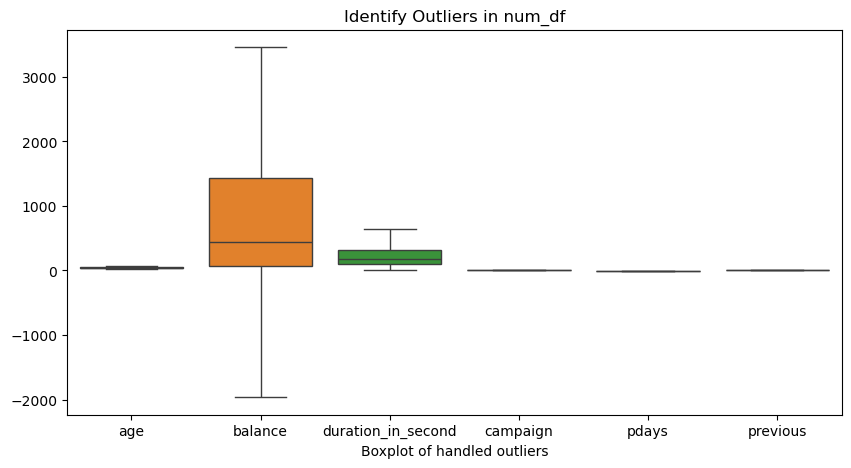

In [224]:
## Identifying outliers and handle the outliers
Q1 = df[['age','balance','duration_in_second','campaign','pdays','previous']].quantile(0.25)
Q3 = df[['age','balance','duration_in_second','campaign','pdays','previous']].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# where clause : if condition is true then replace the value if not true then let it be.
df[['age','balance','duration_in_second','campaign','pdays','previous']] = np.where(df[['age','balance','duration_in_second','campaign','pdays','previous']] > upper_bound, upper_bound, df[['age','balance','duration_in_second','campaign','pdays','previous']])
df[['age','balance','duration_in_second','campaign','pdays','previous']] = np.where(df[['age','balance','duration_in_second','campaign','pdays','previous']] < lower_bound, lower_bound, df[['age','balance','duration_in_second','campaign','pdays','previous']])
#df[['age','balance','duration_in_second','campaign','pdays','previous']]
plt.figure(figsize=(10,5))
sns.boxplot(df[['age','balance','duration_in_second','campaign','pdays','previous']])
plt.title("Identify Outliers in num_df")
plt.xlabel("Boxplot of handled outliers")
plt.show()

#### Detecting outliers: 
>- Using statistical methods IQR, or visualizations (boxplots) to identify anomalies in the data.
#### Assessing impact: 
>- Evaluating how outliers affect the analysis and predictions, determining whether they distort results.
#### Rectification: 
>- Addressing outliers by removing, transforming, or treating them based on their relevance and impact on the model.

# <font color=yellow> **THE END**